# Examining Titantic Data

## hol_5_1_l

### Description

A common data science beginner's challenge is to examine Titantic data to look for patterns in survivability.  You are considering pursuing a career as a data scientist so you have decided to look at the Titantic data to get a cursory look at the career.

Below you should review the data and try to answer the questions:
1. What part did age play?
2. What part did gender play?
3. Did the passenger class make a difference?


# Titanic Data: Factors Affecting Survivability

This data was collected from a web search.  It is available from many different organizations.  The data provides specific data about passengers on the Titanic and whether they survived the disaster or not.

The various data available is defined as:
- PassengerId - Indexed starting at 1
- Survived - Survival (0 = No; 1 = Yes)
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- SibSp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

The questions we are asking:
1. What part did age play?
2. What part did gender play?
3. Did the passenger class make a difference?

In [16]:
conda install matplotlib

Solving environment: done

## Package Plan ##

  environment location: /Users/echodiaz/opt/anaconda3/envs/Jupyter_Projects

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB
    freetype-2.11.0            |       hd8bbffd_0         589 KB
    matplotlib-3.5.0           |   py39hecd8cb5_0          28 KB
    matplotlib-base-3.5.0      |   py39h4f681db_0         5.7 MB
    ------------------------------------------------------------
                                           Total:         6.3 MB

The following NEW packages will be INSTALLED:

  brotli             pkgs/main/osx-64::brotli-1.0.9-hb1e8313_2
  cycler             pkgs/main/noarch::cycler-0.11.0-pyhd3eb1b0_0
  fonttools          pkgs/main/noarch::fonttools-4.25.0-pyhd3eb1b0_0
  freetype           pkgs/main/osx-64::freetype-2.11

In [23]:
!which -a python

/Users/echodiaz/opt/anaconda3/bin/python
/usr/bin/python


In [2]:
help("modules matplotlib")


Here is a list of modules whose name or summary contains 'matplotlib'.
If there are any, enter a module name to get more help.

IPython.core.magics.pylab - Implementation of magic functions for matplotlib/pylab support.
IPython.core.pylabtools - Pylab (matplotlib) support utilities.
ipykernel.pylab.backend_inline - A matplotlib backend for publishing figures via display_data
matplotlib_inline 
matplotlib_inline.backend_inline - A matplotlib backend for publishing figures via display_data
matplotlib_inline.config - Configurable for configuring the IPython inline backend



In [17]:
!jupyter kernelspec list --json

{
  "kernelspecs": {
    "anaconda-jupyter_projects": {
      "resource_dir": "/Users/echodiaz/Library/Jupyter/kernels/anaconda-jupyter_projects",
      "spec": {
        "argv": [
          "/Users/echodiaz/opt/anaconda3/envs/Jupyter_Projects/bin/python",
          "-m",
          "ipykernel_launcher",
          "-f",
          "{connection_file}"
        ],
        "env": {},
        "display_name": "Anaconda (Jupyter Projects)",
        "language": "python",
        "interrupt_mode": "signal",
        "metadata": {
          "debugger": true
        }
      }
    },
    "python3": {
      "resource_dir": "/Users/echodiaz/opt/anaconda3/share/jupyter/kernels/python3",
      "spec": {
        "argv": [
          "/Users/echodiaz/opt/anaconda3/bin/python",
          "-m",
          "ipykernel_launcher",
          "-f",
          "{connection_file}"
        ],
        "env": {},
        "display_name": "Python 3 (ipykernel)",
        "language": "python",
        "interrupt_mode": "signa

#### Load the CSV Data Into a Dataframe

In [15]:
conda install pandas

Solving environment: done

## Package Plan ##

  environment location: /Users/echodiaz/opt/anaconda3/envs/Jupyter_Projects

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    numpy-1.21.2               |   py39h4b4dc7a_0          23 KB
    numpy-base-1.21.2          |   py39he0bd621_0         4.6 MB
    ------------------------------------------------------------
                                           Total:         4.6 MB

The following NEW packages will be INSTALLED:

  blas               pkgs/main/osx-64::blas-1.0-mkl
  bottleneck         pkgs/main/osx-64::bottleneck-1.3.2-py39he3068b8_1
  intel-openmp       pkgs/main/osx-64::intel-openmp-2021.4.0-hecd8cb5_3538
  mkl                pkgs/main/osx-64::mkl-2021.4.0-hecd8cb5_637
  mkl-service        pkgs/main/osx-64::mkl-service-2.4.0-py39h9ed2024_0
  mkl_fft            pkgs/main/osx-64::mkl_fft-1.

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

titanic_df = pd.read_csv('titanic.csv')
                       
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Examine The Affect of Age on Survivability

- Under 12
- 13 - 24
- 25 - 49
- 50 - 74
- 75 and Older

In [22]:
#### Under 12
passengers_under_12 = titanic_df[titanic_df.Age < 12]
passengers_under_12_survived = passengers_under_12[passengers_under_12.Survived == 1]
passengers_under_12_percent_survived = passengers_under_12_survived.Age.count() / passengers_under_12.Age.count()

# Under 13 - 24
passengers_13_to_24 = titanic_df[(titanic_df.Age >= 13) & (titanic_df.Age < 25)]
passengers_13_to_24_survived = passengers_13_to_24[passengers_13_to_24.Survived == 1]
passengers_13_to_24_percent_survived = passengers_13_to_24_survived.Age.count() / passengers_13_to_24.Age.count()

# 25 to 49
passengers_25_to_49 = titanic_df[(titanic_df.Age >= 25) & (titanic_df.Age < 50)]
passengers_25_to_49_survived = passengers_25_to_49[passengers_25_to_49.Survived == 1]
passengers_25_to_49_percent_survived = passengers_25_to_49_survived.Age.count() / passengers_25_to_49.Age.count()

# 50 to 74
passengers_50_to_74 = titanic_df[(titanic_df.Age >= 50) & (titanic_df.Age < 74)]
passengers_50_to_74_survived = passengers_50_to_74[passengers_50_to_74.Survived == 1]
passengers_50_to_74_percent_survived = passengers_50_to_74_survived.Age.count() / passengers_50_to_74.Age.count()

# 75 and over
passengers_75_over = titanic_df[titanic_df.Age > 74]
passengers_75_over_survived = passengers_75_over[passengers_75_over.Survived == 1]
passengers_75_over_percent_survived = passengers_75_over_survived.Age.count() / passengers_75_over.Age.count()

print(f'Under 12:\t{passengers_under_12.Age.count()} - {passengers_under_12_percent_survived}')
print(f'13 - 24:\t{passengers_13_to_24.Age.count()} - {passengers_13_to_24_percent_survived}')
print(f'25 - 49:\t{passengers_25_to_49.Age.count()} - {passengers_25_to_49_percent_survived}')
print(f'50 - 74:\t{passengers_50_to_74.Age.count()} - {passengers_50_to_74_percent_survived}')
print(f'75 & Over:\t{passengers_75_over.Age.count()} - {passengers_75_over_percent_survived}')


Under 12:	68 - 0.5735294117647058
13 - 24:	209 - 0.37320574162679426
25 - 49:	362 - 0.4005524861878453
50 - 74:	72 - 0.3611111111111111
75 & Over:	1 - 1.0


Text(0.5, 1.0, 'Titanic Survivablity by Age Group')

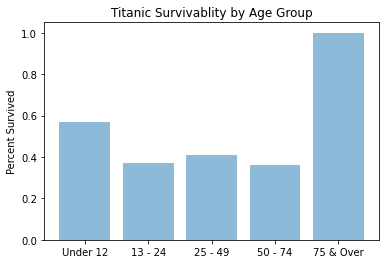

In [23]:
# Show data as a bar chart
groups = ('Under 12', '13 - 24', '25 - 49', '50 - 74', '75 & Over')
percentages = [0.57, 0.37, 0.41, 0.36, 1]
plt.bar(groups, percentages, align='center', alpha=0.5)
plt.ylabel("Percent Survived")
plt.title("Titanic Survivablity by Age Group")

The suggests that children under 13 may have been given some perferential treatment for lifeboats.  However, it is not clear if survivability is only those that died in the event.  It may be that some of the children may have been more susceptible to environment factors, such as, temperature, and died in the lifeboat.

Since there was only one passenger in the 75 & Over group, the survivability of that group is not useful and should not be considered.

### Examine the Affect of Gender on Survivability


In [24]:
#### Male
passengers_male = titanic_df[titanic_df.Sex == "male"]
passengers_male_survived = passengers_male[passengers_male.Survived == 1]
passengers_male_percent_survived = passengers_male_survived.Sex.count() / passengers_male.Sex.count()

#### Female
passengers_female = titanic_df[titanic_df.Sex == "female"]
passengers_female_survived = passengers_female[passengers_female.Survived == 1]
passengers_female_percent_survived = passengers_female_survived.Sex.count() / passengers_female.Sex.count()


print(f'Male:\t{passengers_male.Sex.count()} - {passengers_male_percent_survived}')
print(f'Female:\t{passengers_female.Sex.count()} - {passengers_female_percent_survived}')

Male:	577 - 0.18890814558058924
Female:	314 - 0.7420382165605095


Text(0.5, 1.0, 'Titanic Survivablity by Gender')

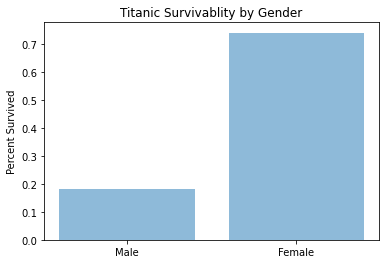

In [25]:
# Show data as a bar chart
groups = ('Male', 'Female')
percentages = [0.18, 0.74]
plt.bar(groups, percentages, align='center', alpha=0.5)
plt.ylabel("Percent Survived")
plt.title("Titanic Survivablity by Gender")

# Age Range of Female Survival

In [53]:
#### Female
passengers_female = titanic_df[titanic_df.Sex == "female"]
passengers_female_survived = passengers_female[passengers_female.Survived == 1]
passengers_female_survived_under_12 = passengers_female_survived[passengers_female_survived.Age < 12]
passengers_female_survived_under_12.Age.count()

19

It is obvious female passengers were given preference over male passengers for lifeboats.  It would be interesting to break down the male survivors by age group.  Hypothesis: Younger males survived at a great rate.

### Examine the Affect of Passenger Class on Survivability

In [26]:
#### Passenger Class 1
passengers_class_1 = titanic_df[titanic_df.Pclass == 1]
passengers_class_1_survived = passengers_class_1[passengers_class_1.Survived == 1]
passengers_class_1_percent_survived = passengers_class_1_survived.Pclass.count() / passengers_class_1.Pclass.count()

#### Passenger Class 2
passengers_class_2 = titanic_df[titanic_df.Pclass == 2]
passengers_class_2_survived = passengers_class_2[passengers_class_2.Survived == 1]
passengers_class_2_percent_survived = passengers_class_2_survived.Pclass.count() / passengers_class_2.Pclass.count()

#### Passenger Class 3
passengers_class_3 = titanic_df[titanic_df.Pclass == 3]
passengers_class_3_survived = passengers_class_3[passengers_class_3.Survived == 1]
passengers_class_3_percent_survived = passengers_class_3_survived.Pclass.count() / passengers_class_3.Pclass.count()


print(f'Class 1:\t{passengers_class_1.Pclass.count()} - {passengers_class_1_percent_survived}')
print(f'Class 2:\t{passengers_class_2.Pclass.count()} - {passengers_class_2_percent_survived}')
print(f'Class 3:\t{passengers_class_3.Pclass.count()} - {passengers_class_3_percent_survived}')


Class 1:	216 - 0.6296296296296297
Class 2:	184 - 0.47282608695652173
Class 3:	491 - 0.24236252545824846


Text(0.5, 1.0, 'Titanic Survivablity by Passenger Class')

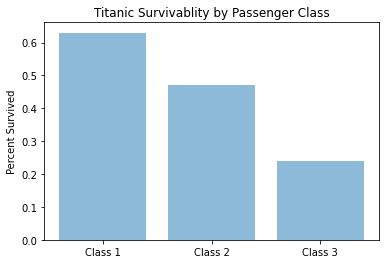

In [27]:
# Show data as a bar chart
groups = ('Class 1', 'Class 2', 'Class 3')
percentages = [0.63, 0.47, 0.24]
plt.bar(groups, percentages, align='center', alpha=0.5)
plt.ylabel("Percent Survived")
plt.title("Titanic Survivablity by Passenger Class")

It is clear that Class 1 passengers were more likely to be saved, whether they were closer to the lifeboats or a genuine perference cannot be deteremined.  One again looking at this data by age and gender would be interesting for furtehr study.

This is not an exhaustive review of the data available, but simple review based on three attributes treating them as independent.  Much more data could be analyzed for deeper more specific ideas of how the surviving passengers were selected.